## LSTM Model Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import yfinance as yf

start = '2014-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start=start, end=end)

C:\Users\IleshDevX\AppData\Local\Temp\ipykernel_20512\1259483767.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.173326,17.294412,17.138864,17.252498,234684800
2014-01-03,16.796104,17.191028,16.779027,17.164949,392467600
2014-01-06,16.887699,16.976805,16.566978,16.686511,412610800
2014-01-07,16.766916,16.950717,16.701096,16.899799,317209200
2014-01-08,16.873108,16.938307,16.725011,16.728736,258529600


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500


In [6]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-01-02,17.173326,17.294412,17.138864,17.252498,234684800
1,2014-01-03,16.796104,17.191028,16.779027,17.164949,392467600
2,2014-01-06,16.887699,16.976805,16.566978,16.686511,412610800
3,2014-01-07,16.766916,16.950717,16.701096,16.899799,317209200
4,2014-01-08,16.873108,16.938307,16.725011,16.728736,258529600


In [7]:
df = df.drop(['Date'], axis=1)
df.head()

C:\Users\IleshDevX\AppData\Local\Temp\ipykernel_20512\2218488136.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,17.173326,17.294412,17.138864,17.252498,234684800
1,16.796104,17.191028,16.779027,17.164949,392467600
2,16.887699,16.976805,16.566978,16.686511,412610800
3,16.766916,16.950717,16.701096,16.899799,317209200
4,16.873108,16.938307,16.725011,16.728736,258529600


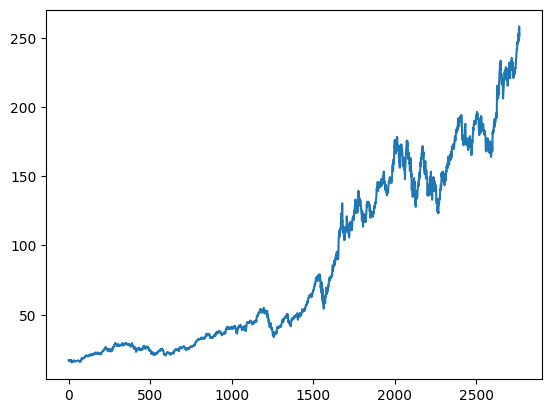

In [8]:
plt.plot(df.Close)

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,17.173326,17.294412,17.138864,17.252498,234684800
1,16.796104,17.191028,16.779027,17.164949,392467600
2,16.887699,16.976805,16.566978,16.686511,412610800
3,16.766916,16.950717,16.701096,16.899799,317209200
4,16.873108,16.938307,16.725011,16.728736,258529600
...,...,...,...,...,...
2762,254.367035,254.745680,252.553466,253.868804,40858800
2763,257.286682,257.296626,254.386957,254.586262,23234700
2764,258.103729,259.179926,256.718662,257.276679,27237100


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,228.410514
2763,228.797496
2764,229.297935
2765,229.784479


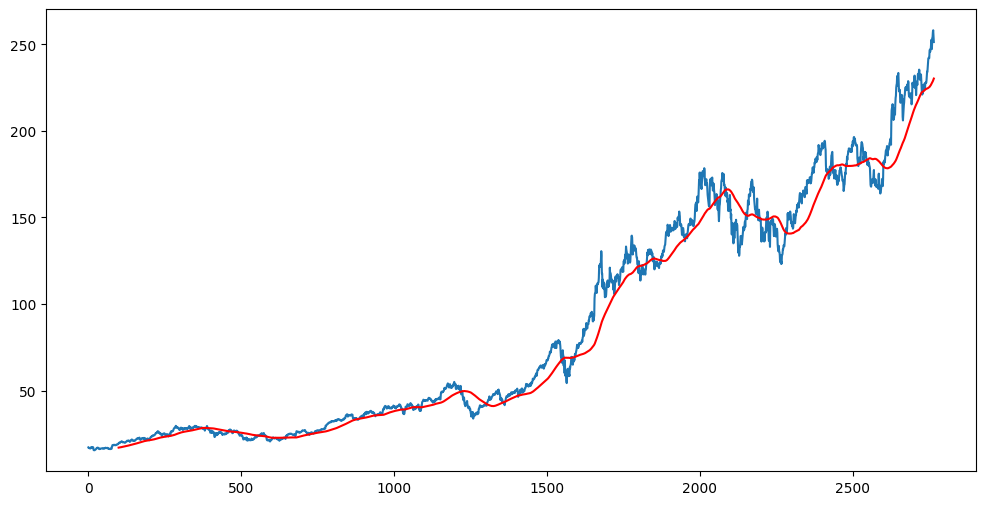

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,210.238068
2763,210.666909
2764,211.097454
2765,211.521334


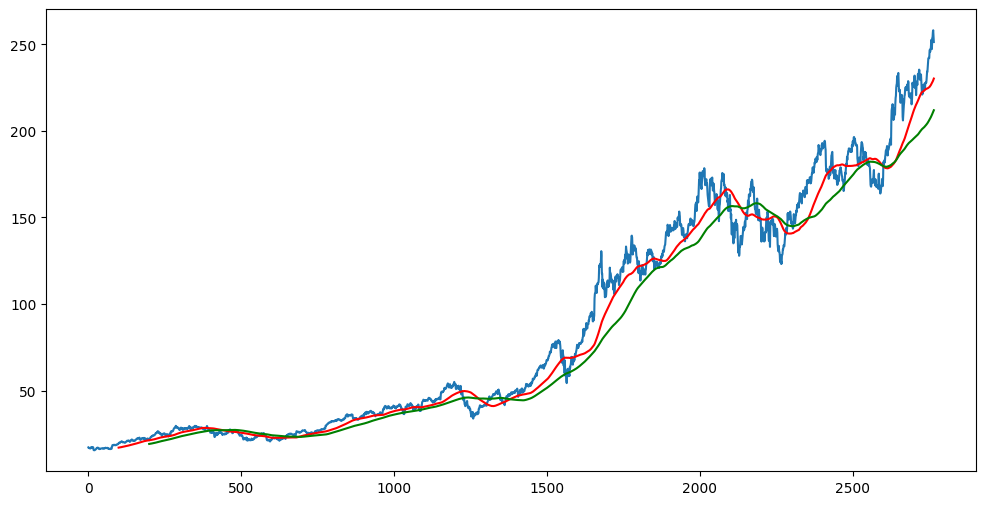

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(2767, 5)

In [15]:
# Spliting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [16]:
print(data_training.shape)
print(data_testing.shape)

(1936, 1)
(831, 1)


In [17]:
data_training.head()

Ticker,AAPL
0,17.173326
1,16.796104
2,16.887699
3,16.766916
4,16.873108


In [18]:
data_testing.head()

Ticker,AAPL
1936,145.837769
1937,146.405594
1938,145.005615
1939,145.896515
1940,145.661545


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0120134 ],
       [0.0092775 ],
       [0.00994182],
       ...,
       [1.        ],
       [0.98878188],
       [0.98139753]], shape=(1936, 1))

In [21]:
data_training_array.shape

(1936, 1)

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

### Machine Learning Model

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

C:\Users\IleshDevX\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\IleshDevX\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\IleshDevX\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.pr

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\IleshDevX\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50


58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - loss: 0.0297
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 49s 830ms/step - loss: 0.0054
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 610ms/step - loss: 0.0049
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 447ms/step - loss: 0.0045
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 445ms/step - loss: 0.0041
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 509ms/step - loss: 0.0034
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 615ms/step - loss: 0.0037
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - loss: 0.0041
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - loss: 0.0032
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - loss: 0.0032
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 0.0031
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - loss: 0.0027
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - loss: 0.0034
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - loss: 0.0030
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step 

In [27]:
model.save('keras_model.h5')

In [28]:
data_testing.head()

Ticker,AAPL
1936,145.837769
1937,146.405594
1938,145.005615
1939,145.896515
1940,145.661545


In [29]:
data_training.tail(100)

Ticker,AAPL
1836,129.895660
1837,130.276215
1838,128.753906
1839,131.076462
1840,131.466751
...,...
1931,150.419342
1932,151.055695
1933,153.395432
1934,151.848694


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [32]:
final_df.head()

Ticker,AAPL
0,129.895660
1,130.276215
2,128.753906
3,131.076462
4,131.466751


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07159433],
       [0.07435007],
       [0.06332643],
       [0.08014498],
       [0.08297122],
       [0.08063956],
       [0.07491559],
       [0.07420886],
       [0.05993468],
       [0.06756624],
       [0.03442432],
       [0.03619113],
       [0.04778001],
       [0.05266439],
       [0.02888046],
       [0.02222667],
       [0.        ],
       [0.01557288],
       [0.0331275 ],
       [0.02477491],
       [0.01472329],
       [0.01359088],
       [0.03213663],
       [0.01882895],
       [0.03065009],
       [0.02923432],
       [0.02888046],
       [0.0177672 ],
       [0.01302448],
       [0.01068856],
       [0.01620983],
       [0.00545055],
       [0.02208502],
       [0.0221559 ],
       [0.02810185],
       [0.0308624 ],
       [0.02364239],
       [0.03241961],
       [0.05457529],
       [0.04862939],
       [0.05223926],
       [0.06384819],
       [0.05443413],
       [0.06745839],
       [0.0793503 ],
       [0.07736858],
       [0.07531547],
       [0.073

In [34]:
input_data.shape

(931, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


### Making Preadictions

In [37]:
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step


In [38]:
y_predicted.shape

(831, 1)

In [39]:
y_test

array([0.18703748, 0.19114933, 0.18101153, 0.18746289, 0.18576138,
       0.16640796, 0.14428985, 0.14776381, 0.16491948, 0.17186685,
       0.17250485, 0.16151657, 0.13698812, 0.14351009, 0.134082  ,
       0.1422342 , 0.11735129, 0.13131686, 0.13762601, 0.14677113,
       0.1440061 , 0.14336843, 0.1341526 , 0.12989888, 0.15010299,
       0.15775919, 0.1698817 , 0.185549  , 0.18909324, 0.19065288,
       0.18505266, 0.18469819, 0.18951898, 0.18618689, 0.21255817,
       0.19292167, 0.18696677, 0.19448109, 0.2049022 , 0.20114493,
       0.20497833, 0.19901492, 0.20164182, 0.18112412, 0.18076932,
       0.1958204 , 0.19589133, 0.20299063, 0.22066861, 0.25176433,
       0.2707909 , 0.27412763, 0.2768963 , 0.28065931, 0.24423863,
       0.26859017, 0.30451341, 0.30075084, 0.29358004, 0.27994916,
       0.30465551, 0.3462583 , 0.37394624, 0.37025482, 0.40497123,
       0.37863222, 0.36862171, 0.40390651, 0.35392588, 0.34597455,
       0.33610613, 0.35910853, 0.37792207, 0.38246595, 0.41121

In [40]:
y_predicted

array([[0.21788268],
       [0.22188313],
       [0.22548473],
       [0.22807017],
       [0.2291785 ],
       [0.2287405 ],
       [0.22676593],
       [0.22349313],
       [0.21939778],
       [0.21496482],
       [0.21072373],
       [0.20701574],
       [0.20371845],
       [0.20070484],
       [0.19792925],
       [0.19535725],
       [0.19298995],
       [0.19077024],
       [0.18862844],
       [0.18655916],
       [0.18462317],
       [0.18287995],
       [0.18138705],
       [0.18011822],
       [0.17902784],
       [0.1781312 ],
       [0.17747864],
       [0.17715545],
       [0.17728297],
       [0.17794932],
       [0.17920229],
       [0.18101168],
       [0.1833047 ],
       [0.1859355 ],
       [0.18871003],
       [0.19169879],
       [0.19473182],
       [0.19759205],
       [0.20016268],
       [0.20253764],
       [0.20471819],
       [0.20671564],
       [0.20851466],
       [0.21011804],
       [0.21135789],
       [0.21206878],
       [0.21225634],
       [0.212

In [41]:
scaler.scale_

array([0.0072414])

In [42]:
scale_factor = 1/0.0072414
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

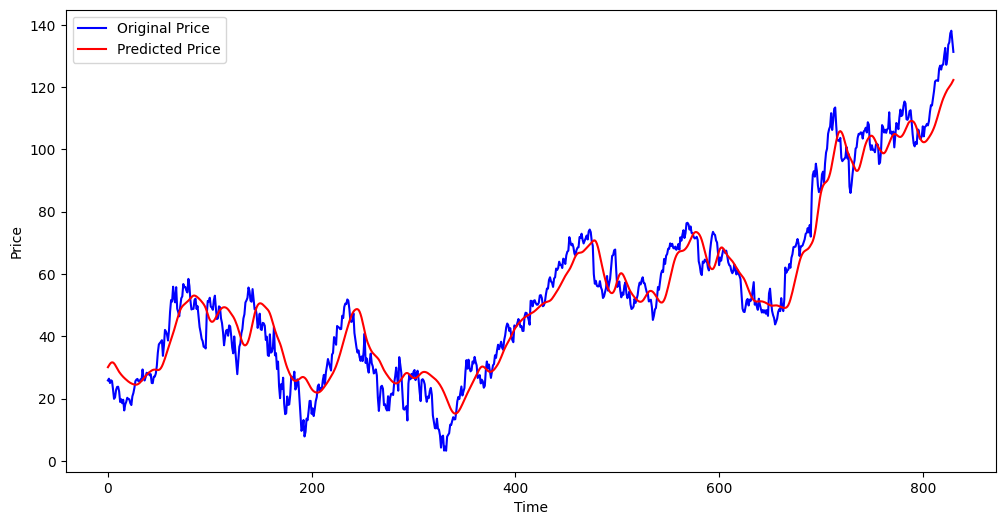

: 

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()